In [107]:
import numpy as np
from scipy.io import loadmat, wavfile
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
from Signal_Analysis.features.signal import get_F_0, get_HNR
from importlib import reload

# tools work in progress
import tools
reload(tools)
from tools import *

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5
plt.close("all")

In [108]:
Fs, x= wavfile.read("roy.wav")
x = x.astype(np.float64)
x /= x.std()
print(f"Fs= {Fs}")
tt = np.linspace(0, len(x) / Fs, len(x))

# Test
x[10000:30000] = 0

Fs= 48000


In [109]:
fl = 2 * int(0.09 * Fs)
frames, frames_start = split_frames(x, fl, Fs, overlap=int(1 * fl / 8))
tt_frames_center = tt[frames_start] + int(fl/2)/Fs

frame length    : 8640 samples
frame length    : 0.18 seconds
number of frames: 15


## Compute HNR

In [110]:
hnr_frames = []
for f in frames:
    hnr_frames.append(get_HNR(f, Fs, silence_threshold=0.5))

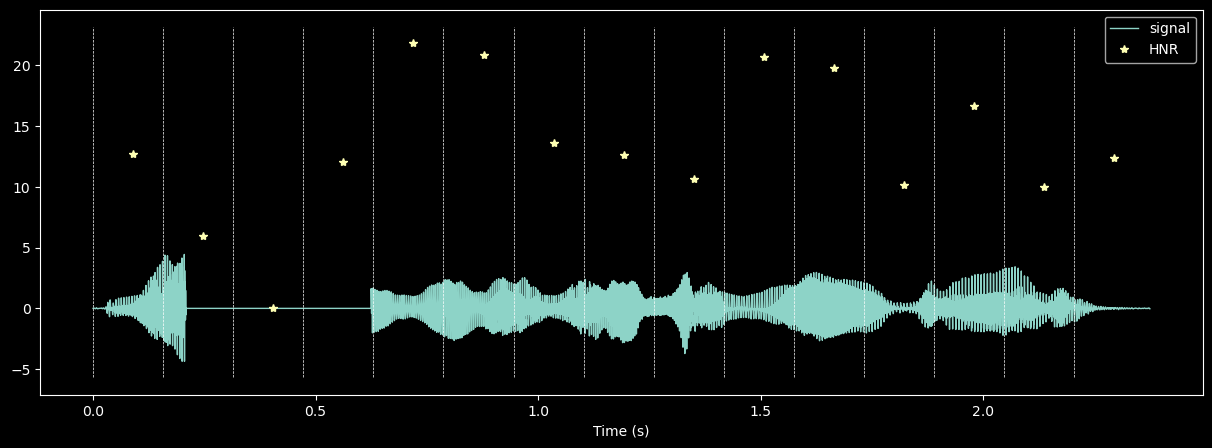

In [111]:
plt.figure(figsize=(15, 5))
plt.plot(tt, x, linewidth=1, label="signal")
plt.xlabel("Time (s)")
plt.plot(tt_frames_center, hnr_frames, "*", label="HNR")
ymin, ymax = plt.ylim()
plt.vlines(tt[frames_start], ymin, ymax, linestyles="dashed")
# plt.xlim(0,1.5)
plt.legend()
plt.show()

## Sort frames by harmonic content

In [112]:
fade = np.hamming(len(frames)) ** 0.1

idx_sort = np.argsort(hnr_frames)
x_sorted = [frames[i] for i in idx_sort]
wavfile.write("output_HNRsplit/x_sorted.wav", int(Fs), stitch_frames(x_sorted,0))

c:\Users\marcu\google_drive\Courses\vowel_project\VowelProject\tools.py:20: RuntimeWarning: invalid value encountered in divide
  return np.int16(x / np.max(np.abs(x)) * np.iinfo(np.int16).max)
c:\Users\marcu\google_drive\Courses\vowel_project\VowelProject\tools.py:20: RuntimeWarning: invalid value encountered in cast
  return np.int16(x / np.max(np.abs(x)) * np.iinfo(np.int16).max)


## Find peaks

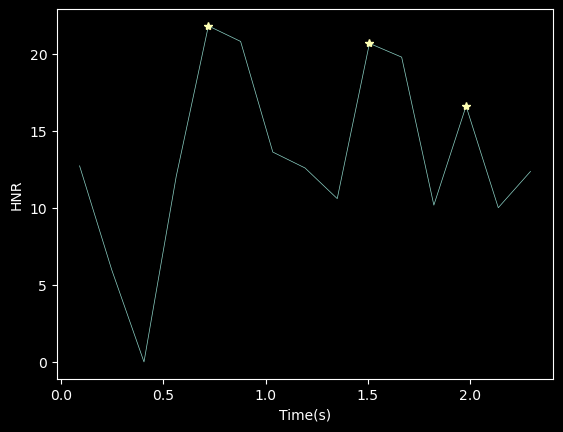

In [113]:
min_h = 10

peaks, peaks_prop = signal.find_peaks(
    hnr_frames,
    height=min_h,
)

#print(peaks_prop.keys())
plt.figure()
plt.plot(tt_frames_center, hnr_frames)

# mark peaks
plt.plot(tt_frames_center[peaks], peaks_prop["peak_heights"], "*")
plt.xlabel("Time(s)")
plt.ylabel("HNR")
plt.show()

In [114]:
x_peaks = [frames[i] for i in peaks]
wavfile.write("output_HNRsplit/x_peaks.wav", int(Fs), stitch_frames(x_peaks,0))